In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

sns.set()

In [2]:
from sklearn.datasets import load_digits

dataset = load_digits()
X = dataset.data
y = dataset.target

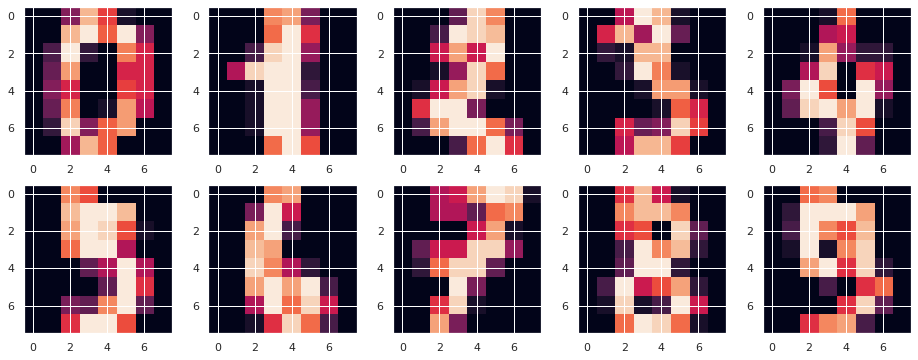

In [3]:
plt.figure(figsize=(16,6))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]))

# Задание 1
Обучить PCA и изучить зависимость кол-ва главных компонент от дисперсии, которую они сохраняют при проекции.

In [4]:
pca = PCA()
pca.fit(X)
print(pca.components_.shape)
sum = 0
for i in range(pca.explained_variance_ratio_.shape[0]):
    sum = sum + pca.explained_variance_ratio_[i]
    
    print("%.0f component: %.4f  "%(i, pca.explained_variance_ratio_[i]))
    print("sum = {}\n".format(sum))
    if sum <= 0.95: 
        continue
    else:
        print("sum = {}".format(sum))
        print("num of components = {}".format(i))
        break


(64, 64)
0 component: 0.1489  
sum = 0.1489059358406385

1 component: 0.1362  
sum = 0.28509364823699307

2 component: 0.1179  
sum = 0.403039585876751

3 component: 0.0841  
sum = 0.4871393800868428

4 component: 0.0578  
sum = 0.5449635267268981

5 component: 0.0492  
sum = 0.5941326298981381

6 component: 0.0432  
sum = 0.6372925000063959

7 component: 0.0366  
sum = 0.6739062257772365

8 component: 0.0335  
sum = 0.7074387067569077

9 component: 0.0308  
sum = 0.7382267688459532

10 component: 0.0237  
sum = 0.7619501772859842

11 component: 0.0227  
sum = 0.7846771429740799

12 component: 0.0182  
sum = 0.8028957761040318

13 component: 0.0177  
sum = 0.8206343254758509

14 component: 0.0147  
sum = 0.8353053364037439

15 component: 0.0141  
sum = 0.849402492419831

16 component: 0.0132  
sum = 0.8625883844271053

17 component: 0.0125  
sum = 0.8750697626053608

18 component: 0.0102  
sum = 0.8852469422085765

19 component: 0.0091  
sum = 0.8943031165985263

20 component: 0.0089  

**Вопрос 1:** Какое минимальное количество главных компонент необходимо для сохранения суммарной explained_variance_ratio на уровне >= 0.95


In [5]:
n = i + 1
print(n)

29


Получив необходимое значение главных компонент, сделайте следующее:

    Обучите PCA с кол-вом компонент, полученным в вопросе 1
    Трансформируйте исходный датасет
    Возьмите все объекты, на которых нарисован 0


**Вопрос 2:** чему равно среднее значение признаков из п.3 (усреднение делать по всему, округлить до 4 знака после запятой)?

При инициализации PCA используйте random_state=42 для воспроизводимости результатов

Projecting 64-dimensional data to 2D


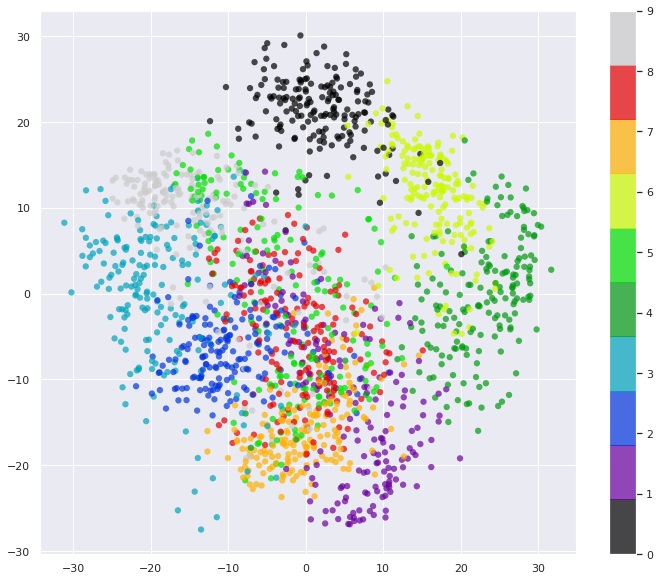

In [6]:
pca = PCA(n_components=n, random_state=42)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

In [7]:
print(X_reduced.shape)
print(X_reduced[:,1])
print(y)
print(X_reduced[0,])
print(X_reduced[0,1])

(1797, 29)
[ 21.27488343 -20.76869897  -9.9559864  ...  -6.96025223  12.42395366
   6.36554913]
[0 1 2 ... 8 9 8]
[-1.25946647 21.27488343 -9.46305483 13.01418858 -7.12882023 -7.44066097
  3.25284128  2.55346099 -0.5818395   3.62571594  2.58603604  1.55177789
  0.85463553 -3.33833646  5.90837458  2.74469144  0.42093845 -0.89725842
  0.70531889 -3.46239379  2.68468119  1.0157087   2.0086229   1.29554066
  1.15198097  2.31088936  3.72861313 -0.92336447 -1.27611947]
21.274883434441808


In [8]:
print(y)
np_y = np.array(y)
print(np_y)
np_X = np.array(X_reduced)
mask = (y == 0 )
print(mask)
round(np_X[mask,].mean(),4)

[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]
[ True False False ... False False False]


0.5707

# Задание 2
На том же датасете, что и выше, применить K-means (random_state=42) и ответить на ряд вопросов

In [9]:
from sklearn.cluster import KMeans

scaler = StandardScaler()

Кластеризуйте нормализованный датасет (X_std) при помощи K-means

In [10]:
X_std = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_std)
print(kmeans.labels_)

[0 3 3 ... 3 7 7]


**Вопрос 3:** какой преобладающий номер кластера (начало с 0) у рукописных единиц?

In [11]:
print(y)
mask = (y == 1)
print(mask)
np_labels = np.array(kmeans.labels_)
print(np_labels)
print(np_labels[mask])
import collections
collections.Counter(np_labels[mask])

[0 1 2 ... 8 9 8]
[False  True False ... False False False]
[0 3 3 ... 3 7 7]
[3 9 9 9 9 9 9 9 9 9 3 3 9 9 9 9 9 9 9 9 9 9 9 9 9 9 3 9 9 3 3 9 3 3 9 3 3
 3 3 9 9 9 9 9 6 9 9 9 9 9 9 9 6 6 6 6 6 6 6 6 6 6 6 3 6 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 6 3 3 3 3 3 3 3 6 6 6 6 6 6 6 6 6 6 6 6 6 3 3 3 3 3 3 3
 3 3 3 3 3 3 9 9 3 3 3 3 3 3 3 3 3 3 4 9 3 9 3 3 9 3 9 3 3 3 3 3 9 9 9 9 9
 9 9 9 9 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


Counter({3: 96, 9: 58, 6: 27, 4: 1})

Также, как и на занятии, спроецируйте полученный результат на плоскость при помощи TSNE (random_state=42)

In [18]:
tsne = TSNE(random_state=42)
X_embedded = tsne.fit_transform(X_std)
X_embedded.shape

(1797, 2)

**Вопрос 4:** в каком диапазоне по оси X лежат объекты, соответствующие написанным от руки нулям (ответы округлить до 2 знака после запятой?


Projecting 64-dimensional data to 2D


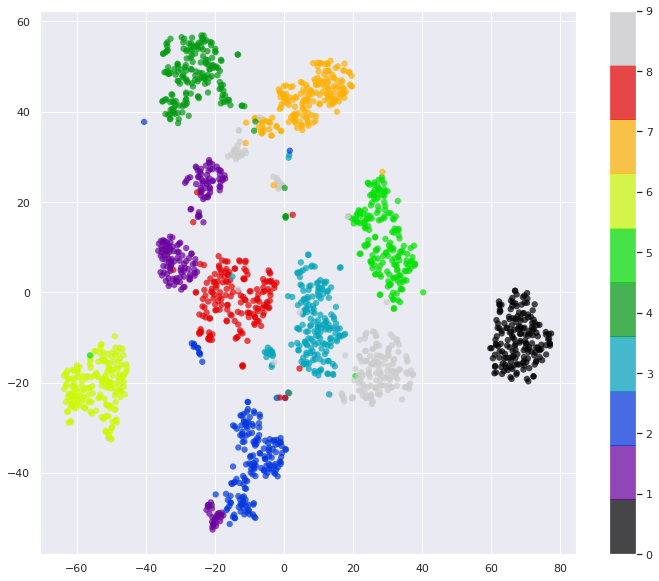

In [19]:
print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

(59.70000076293945, 77.30999755859375)


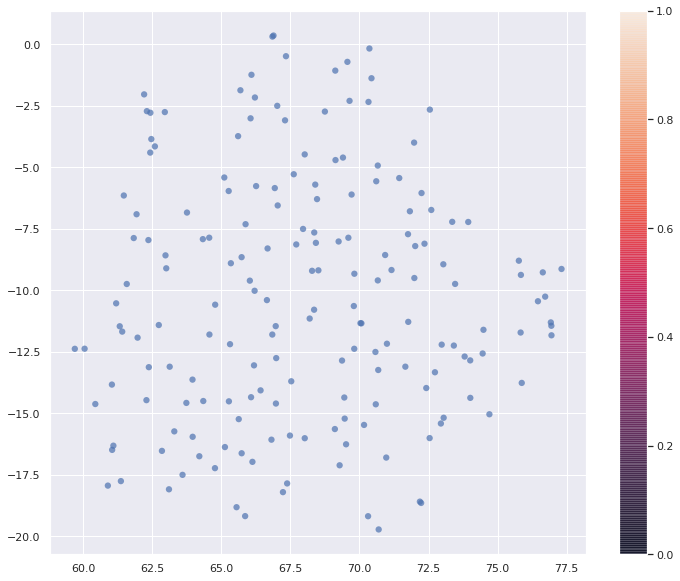

In [20]:
np_y = np.array(y)
np_X = np.array(X_embedded)
mask = (y == 0 )
print("({0}, {1})".format(round(np_X[mask,0].min(),2), round(np_X[mask,0].max(),2)))
plt.figure(figsize=(12,10))
plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1],  
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()